In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
titanic_data = sns.load_dataset('titanic')

In [3]:
print(titanic_data.shape)
print(titanic_data.columns)
print(titanic_data.dtypes)
print(titanic_data.describe(include='all'))

(891, 15)
Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object
          survived      pclass   sex         age       sibsp       parch  \
count   891.000000  891.000000   891  714.000000  891.000000  891.000000   
unique         NaN         NaN     2         NaN         NaN         NaN   
top            NaN         NaN  male         NaN         NaN         NaN   
freq           NaN         NaN   577         NaN         NaN         NaN   
mean      0.383838    2.308642   NaN   29.69911

In [4]:
missing = titanic_data.isnull().sum().sort_values(ascending=False)
missing = missing[missing > 0]
print(missing)

deck           688
age            177
embarked         2
embark_town      2
dtype: int64


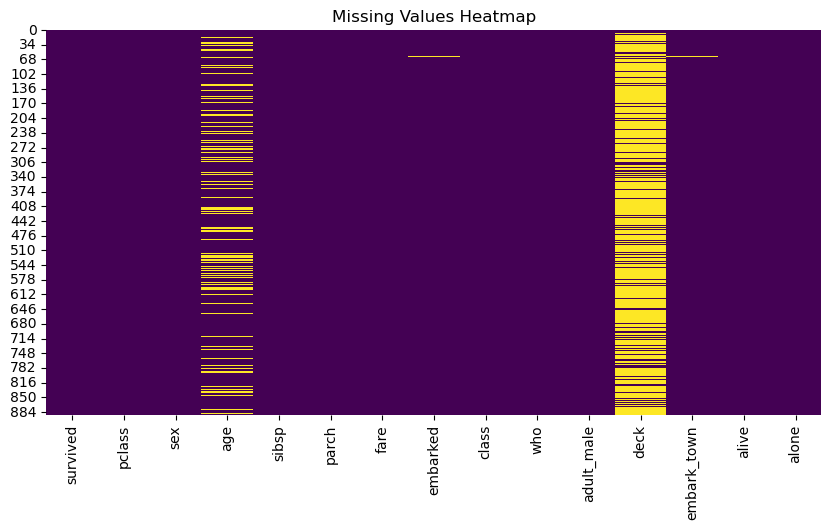

In [5]:
plt.figure(figsize=(10, 5))
sns.heatmap(titanic_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [6]:
titanic_data.drop(['deck'], axis=1, inplace=True)
titanic_data['age'].fillna(titanic_data['age'].median(), inplace=True)
titanic_data['embark_town'].fillna(titanic_data['embark_town'].mode()[0], inplace=True)
titanic_data['embarked'].fillna(titanic_data['embarked'].mode()[0], inplace=True)

C:\Users\RUDRANSH\AppData\Local\Temp\ipykernel_20076\1535665085.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['age'].fillna(titanic_data['age'].median(), inplace=True)
C:\Users\RUDRANSH\AppData\Local\Temp\ipykernel_20076\1535665085.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

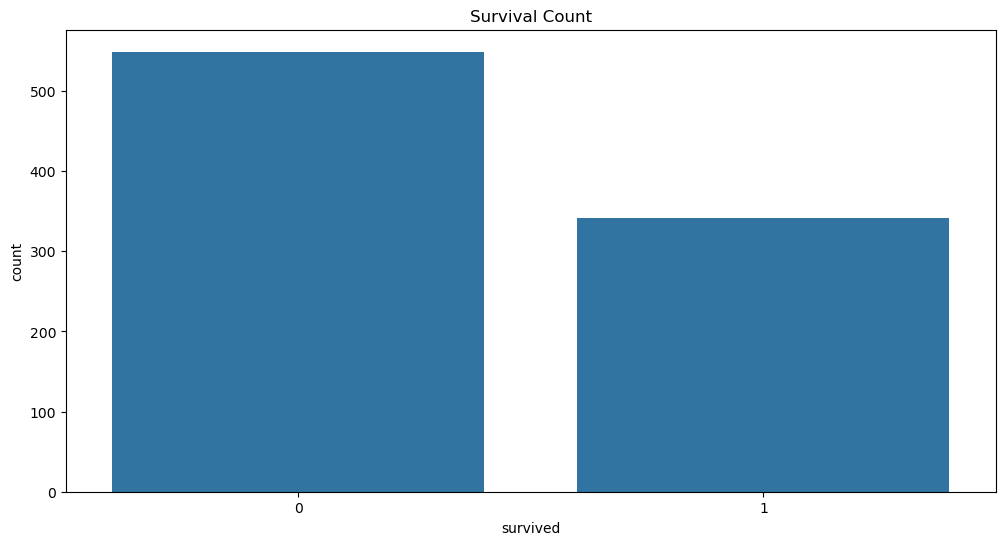

In [7]:
plt.figure(figsize=(12, 6))
sns.countplot(data=titanic_data, x='survived')
plt.title('Survival Count')
plt.show()

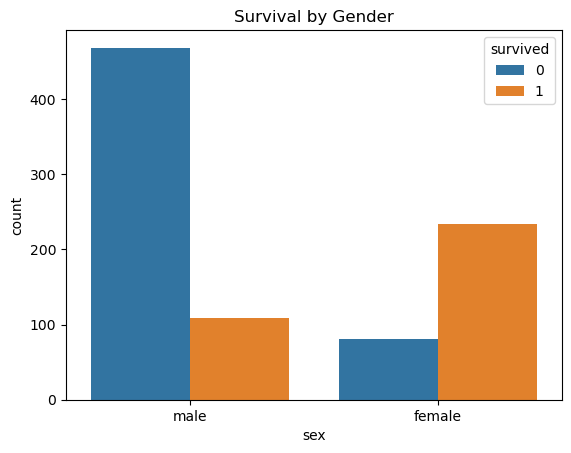

In [8]:
sns.countplot(data=titanic_data, x='sex', hue='survived')
plt.title('Survival by Gender')
plt.show()

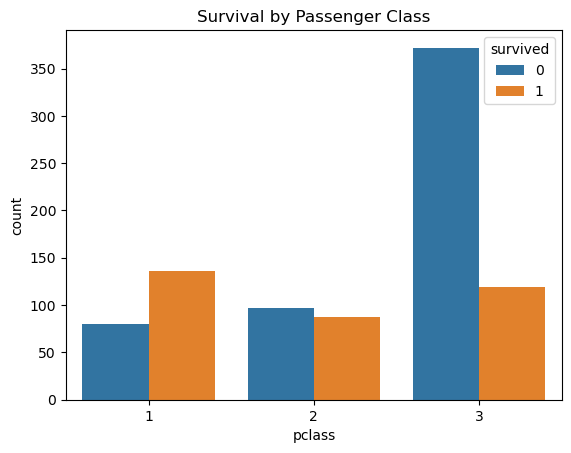

In [9]:
sns.countplot(data=titanic_data, x='pclass', hue='survived')
plt.title('Survival by Passenger Class')
plt.show()

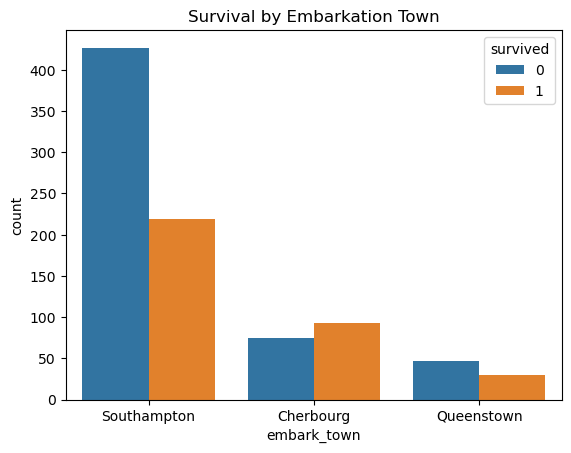

In [10]:
sns.countplot(data=titanic_data, x='embark_town', hue='survived')
plt.title('Survival by Embarkation Town')
plt.show()

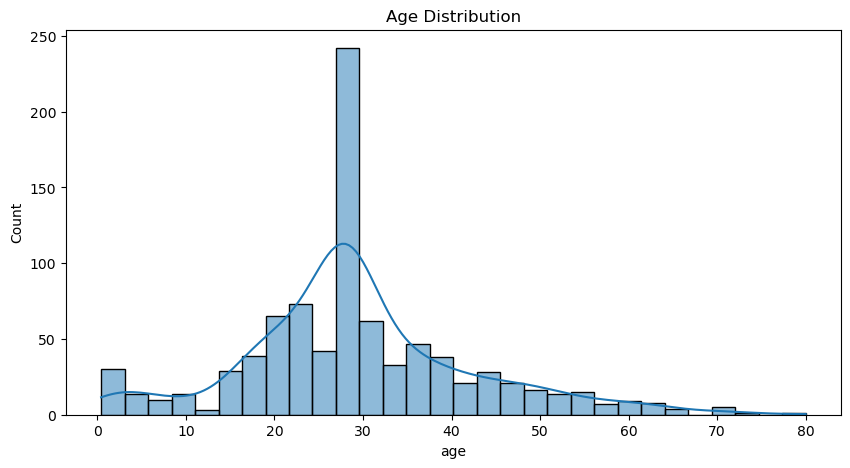

In [11]:
plt.figure(figsize=(10, 5))
sns.histplot(titanic_data['age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.show()

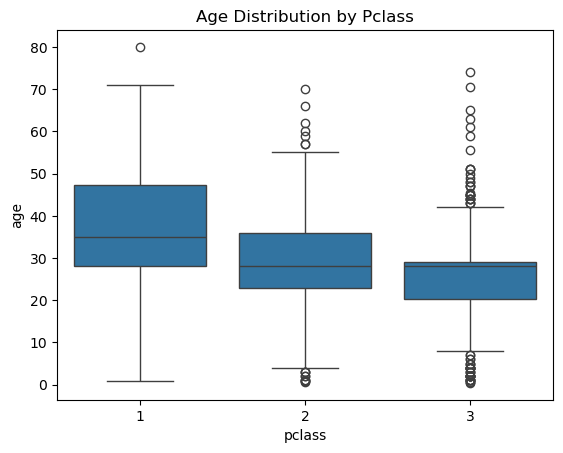

In [12]:
sns.boxplot(x='pclass', y='age', data=titanic_data)
plt.title('Age Distribution by Pclass')
plt.show()

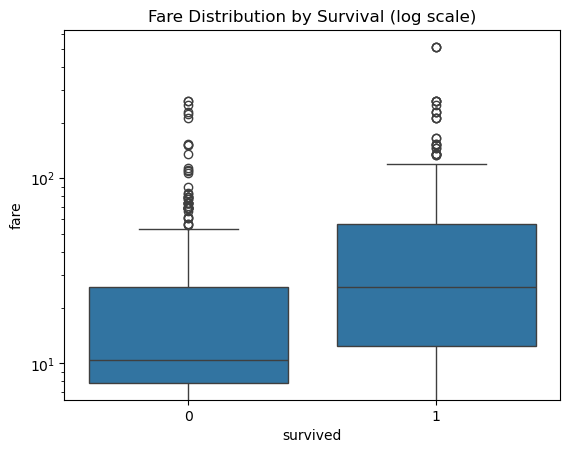

In [13]:
sns.boxplot(x='survived', y='fare', data=titanic_data)
plt.yscale('log')
plt.title('Fare Distribution by Survival (log scale)')
plt.show()

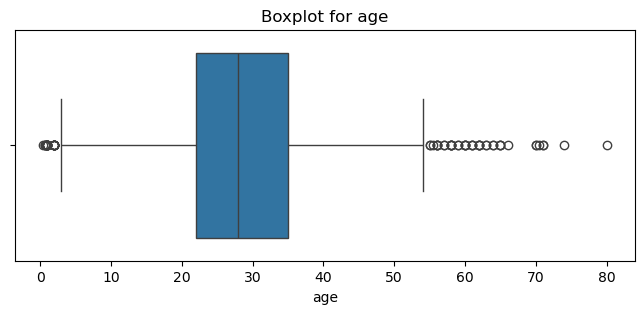

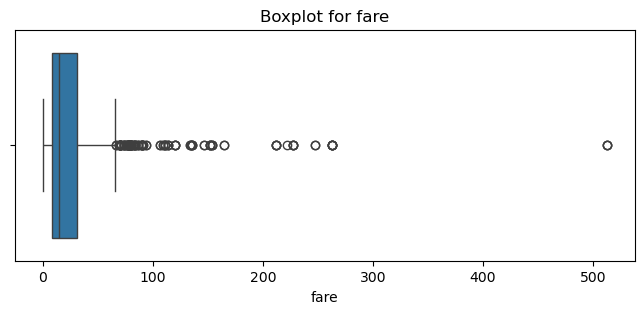

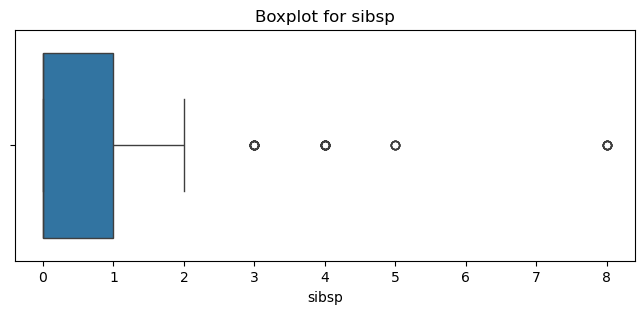

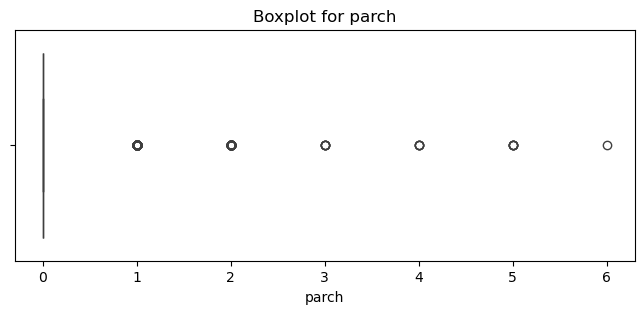

In [14]:
numeric_cols = ['age', 'fare', 'sibsp', 'parch']
for col in numeric_cols:
    plt.figure(figsize=(8, 3))
    sns.boxplot(x=titanic_data[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

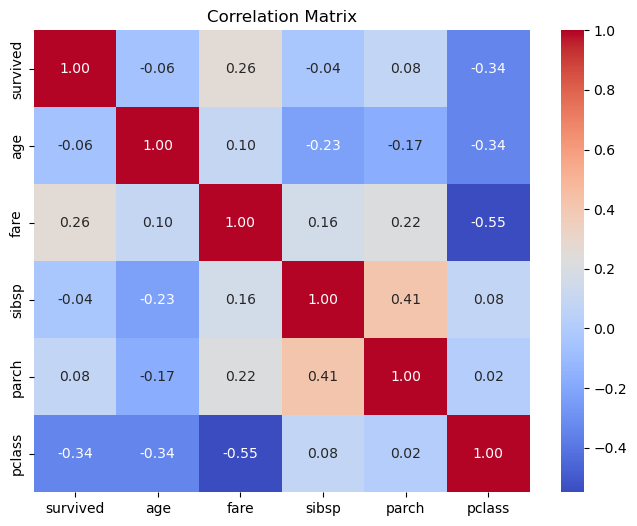

In [15]:
corr = titanic_data[['survived', 'age', 'fare', 'sibsp', 'parch', 'pclass']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

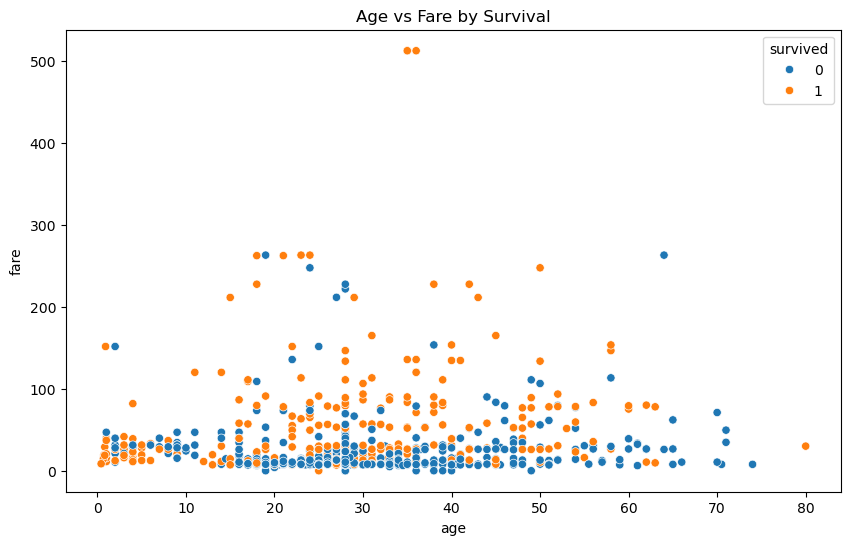

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=titanic_data, x='age', y='fare', hue='survived')
plt.title('Age vs Fare by Survival')
plt.show()